In [1]:
"""
#El modelo de regresion lineal es un modelo matematico
#utilizado para aproximar la relacion de dependencias
#entre una variable numerica continua y las variables
#independientes X asi como un termino aleatorio epsilon
#el cual corresponde al error o ruido de los modelos 
#usados.
#el objetivo de estos modelo es minimizar la distancia 
#cuadratica de todos los puntos en relacion a una
#recta de regresion
#La variable Y se le llama independiente pero tambien
se le llama respuesta. Las variables X se le llama 
explicativas o regresoras o independientes.
Supuestos para usar este modelo:
-Relacion lineal entre variables
-Errores independientes
-Que los errores tengan una esperanza matematica 
a cero
-Que el error total sea la suma de todos los errores
Y= B + B1X2 + B2X2 + B3X3 + ..... + E
"""

'\n#El modelo de regresion lineal es un modelo matematico\n#utilizado para aproximar la relacion de dependencias\n#entre una variable numerica continua y las variables\n#independientes X asi como un termino aleatorio epsilon\n#el cual corresponde al error o ruido de los modelos \n#usados.\n#el objetivo de estos modelo es minimizar la distancia \n#cuadratica de todos los puntos en relacion a una\n#recta de regresion\n#La variable Y se le llama independiente pero tambien\nse le llama respuesta. Las variables X se le llama \nexplicativas o regresoras o independientes.\nSupuestos para usar este modelo:\n-Relacion lineal entre variables\n-Errores independientes\n-Que los errores tengan una esperanza matematica \na cero\n-Que el error total sea la suma de todos los errores\n'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("D:/Python/achieves/2008.csv")

In [13]:
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(100000)
#se tratara de calcular el retraso de la llega a partir
#del retraso en la salida
Y=df["ArrDelay"]
X=df[["DepDelay"]]

In [ ]:
df.columns

In [14]:
#con la siguiente linea se ajusta el modelo
regr = linear_model.LinearRegression()
#se ajusta el calculo con X e Y
regr.fit(X, Y)
#imprime el valor de las betas
print("Coeficientes: ", regr.coef_)
#con la funcion predict genera las predicciones
Y_pred = regr.predict(X)
#con r2_score calcula que tan buena es la prediccion
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [1.01821697]
R cuadrado:  0.867259514359571


InvalidIndexError: (slice(None, None, None), None)

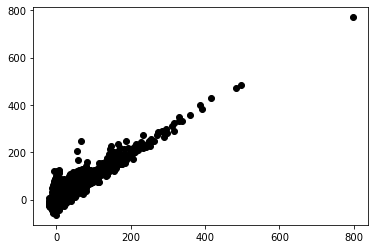

In [15]:
plt.scatter(X[1:10000],Y[1:10000], color = "black")
plt.plot(X[1:10000], Y_pred[1:10000], color = "Blue")
plt.show()

In [16]:
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut"]]
#cambia el tipo de valor de en la columna de 
# entero a cadena
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)
#convierte las columnas seleccionadas en dummies
#los cuales son variables que toman valores de
#1 o 0 en funcion si aparece la categoria que se esta
#estudiando por ejemplo si se usara la columna month
# mostrara unos y ceros dependiendo si es el valor
#al mes que pertenece

dummies = pd.get_dummies(data = df[["Month", "DayofMonth", "DayOfWeek", "Origin","Dest"]])
X=dummies.add(X, fill_value = 0)

In [18]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=647)

In [19]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.18033163680060116


In [20]:
X = X.add(df[["DepDelay"]], fill_value = 0)

In [21]:
regs = linear_model.LinearRegression()
regr.fit(X,Y)

Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

R cuadrado:  0.9711117662795968
